## Chatper 3

In [1]:
# Example Chi square test
import pandas as pd
import numpy as np
from scipy.stats import chi2
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
from bokeh.charts import Bar,Histogram, output_notebook, show , BoxPlot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# read flights delay data

df_GS2002 = pd.read_csv('Data/GSS2002.csv')
df_GS2002.head()

,ID,Region,Gender,Race,Education,Marital,Religion,Happy,Income,PolParty,Politics,Marijuana,DeathPenalty,OwnGun,GunLaw,SpendMilitary,SpendEduc,SpendEnv,SpendSci,Pres00,Postlife
0,1,South Central,Female,White,HS,Divorced,Inter-nondenominational,Pretty happy,30000-34999,Strong Rep,Conservative,NaN,Favor,No,Favor,Too little,Too little,About right,About right,Bush,Yes
1,2,South Central,Male,White,Bachelors,Married,Protestant,Pretty happy,75000-89999,Not Str Rep,Conservative,Not legal,Favor,Yes,Oppose,About right,Too little,About right,About right,Bush,Yes
2,3,South Central,Female,White,HS,Separated,Protestant,NaN,35000-39999,Strong Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bush,NaN
3,4,South Central,Female,White,Left HS,Divorced,Protestant,NaN,50000-59999,"Ind, Near Dem",NaN,NaN,NaN,NaN,NaN,About right,Too little,Too little,Too little,NaN,NaN
4,5,South Central,Male,White,Left HS,Divorced,Protestant,NaN,40000-49999,Ind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_GS2002_cleaned = df_GS2002[['Education','DeathPenalty']].dropna(axis= 0, subset= ['Education','DeathPenalty'])
df_GS2002_cleaned.reset_index(inplace= True, drop= True)
df_GS2002_cleaned.head()

,Education,DeathPenalty
0,HS,Favor
1,Bachelors,Favor
2,HS,Favor
3,HS,Favor
4,HS,Favor


In [3]:
def chisq(df):
    df_cont_table =pd.pivot_table(df, index= ['Education'], columns=['DeathPenalty'], values=[], aggfunc = len)
    df_cont_table['Row_Sum'] = df_cont_table['Favor'] + df_cont_table['Oppose']
    df_cont_table = df_cont_table.reset_index()
    df_cont_table.columns.name = ''
    Ex_favor_series=df_cont_table['Row_Sum']*sum(df_cont_table.Favor)/sum(df_cont_table.Row_Sum)
    Ex_Oppose_series =  df_cont_table['Row_Sum']*sum(df_cont_table.Oppose)/sum(df_cont_table.Row_Sum)
    test_stat= sum((df_cont_table['Favor'] - Ex_favor_series ) **2/Ex_favor_series)+ sum((df_cont_table['Oppose'] - Ex_Oppose_series ) **2/Ex_Oppose_series)
    return test_stat
chisq(df_GS2002)

23.450927461370544

In [4]:
def permute_df(df):
    sampled = df['Education'].sample(frac = 1)
    df['Education'] = sampled.reset_index(drop= True)
    return df

p value :


9.0000000000000006e-05

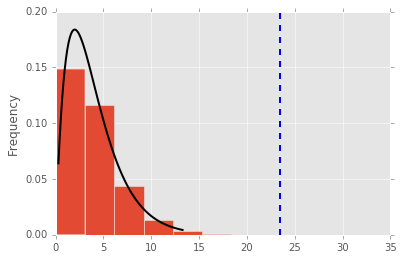

In [14]:
chisqseries = pd.Series(np.zeros(10**5 -1))
for index in range(len(chisqseries)):
    chisqseries[index] = chisq(permute_df(df_GS2002_cleaned))
plt.figure()
x = np.linspace(chi2.ppf(0.01, 4),chi2.ppf(0.99, 4), 100)
chisqseries.plot.hist(normed = True)
#pd.Series(r).plot.hist(normed = True)
rv = chi2(4)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.axvline(chisq(df_GS2002), color='b', linestyle='dashed', linewidth=2)
print('p value :')
((chisqseries > chisq(df_GS2002) ).sum() + 1)/(10**5)